# Basic statistics with Python - Part 1

# 1. Knowing the data

## 1.1 - Dataset that will be used in the project

### Pesquisa Nacional por Amostra de Domicílios - PNAD - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investigates annually, on a permanent basis, general characteristics of the population, education, work, income and housing and others, with variable periodicity, according to the information needs for the country, such as characteristics on migration, fertility, nuptiality, health, food security, among other topics. The survey of these statistics constitutes, throughout the 49 years of research, an important instrument for the formulation, validation and evaluation of policies oriented to socioeconomic development and the improvement of living conditions in Brazil.

### Data source

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variables used in the dataset

### Income

Monthly income from main job for people 10 years old and over.

### Age
Age of the resident on the reference date in years.

### Height
Height of the resident in meters.

### State

|Code|Description|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

### Gender

|Code|Description|
|---|---|
|0|Male|
|1|Female|

### Years of Study

|Code|Description|
|---|---|
|1|0 or less than a year|
|2|1 year|
|3|2 years|
|4|3 years|
|5|4 years|
|6|5 years|
|7|6 years|
|8|7 years|
|9|8 years|
|10|9 years|
|11|10 years|
|12|11 years|
|13|12 years|
|14|13 years|
|15|14 years|
|16|15 years or more|
|17|Not informed| 
||Not relevant |

### Color

|Code|Description|
|---|---|
|0|Indigenous|
|2|While|
|4|Black|
|6|Yellow|
|8|Brown|
|9|Not informed|

#### Disclaimer

The following treatments were performed on the original data:
1. the records where the <b>Rent</b> was invalid (999 999 999) were deleted;
2. the records where the <b>income</b> was missing were deleted;
3. only the records of the <b>Reference Persons</b> of each domicile (responsible for the domicile) were considered.

### Importing and reading the dataset

https://pandas.pydata.org/

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/dataset.csv')

In [3]:
df

,State,Gender,Age,Color,Years of Study,Income,Height
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


## 1.2 Data Types or Statistical Variables
***

# Qualitative (or Categorical) Variables

Categorical variables represent groupings of some kind. They are sometimes recorded as numbers, but the numbers represent categories rather than actual amounts of things. Variables that can be ordered or hierarchical.

In our dataset: State, Gender, Color, Years of Study

### ► Ordinal Variables
Groups that are ranked in a specific order.

Even though the dataset has an id for this column, the content is a string, but in this case we can rank the years of study. We don't perform any arithmetic operation in those values but we can rank them in a specifi order.

In [4]:
sorted(df['Years of Study'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

### ► Nominal Variables
Groups with no rank or order between them.

In [5]:
sorted(df['State'].unique())

[11,
 12,
 13,
 14,
 15,
 16,
 17,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 35,
 41,
 42,
 43,
 50,
 51,
 52,
 53]

In [6]:
sorted(df['Gender'].unique())

[0, 1]

In [7]:
sorted(df['Color'].unique())

[0, 2, 4, 6, 8]

# Quantitative Variables
When you collect quantitative data, the numbers you record represent real amounts that can be added, subtracted, divided, etc. There are two types of quantitative variables: discrete and continuous.

In our dataset: Age, Income, height

### ► Discrete variables (aka integer variables)

Variables that represent a count where possible values form a finite or enumerated set.

In [8]:
df['Age'].min()

13

In [9]:
df['Age'].max()

99

#### Disclaimer

The variable age can be classified in three different ways:
> 1. <b>Discrete</b> - when it represents full years (whole numbers);
> 2. <b>Continuous</b> - when it represents the exact age, being represented by fractions of years (13 years, 7 months, etc.); and
> 3. <b>Ordinal</b> - when it represents age groups.

### ► Continuous variables

Measurements of continuous or non-finite values. Variables that represent a count or measurement that assumes values on a continuous scale (actual numbers).

In [10]:
df['Height'].min()

1.339244614

In [11]:
df['Height'].max()

2.028496765

### Classification
<img  src='https://aprendeconalf.es/statistics/manual/img/introduction/variable_types.svg' width='70%' style="background-color:rgba(255, 255, 255, 1);">

# 2 Distribution of frequencies

The first step in a work of analysis is the knowledge of the behavior of the variables involved in the study. Using statistical techniques such as the analysis of <b> FREQUENCY DISTRIBUTIONS</b> and <b>HISTOGRMS</b> we can better assess how the phenomena under study are distributed.

## 2.1 Frequency distribution for qualitative variables
***

### Method 1 - Separate pandas Series

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html

In [69]:
gender_frequency = df['Gender'].value_counts()
gender_frequency

0    53250
1    23590
Name: Gender, dtype: int64

In [70]:
gender_frequency_normalized = df['Gender'].value_counts(normalize=True)
gender_frequency_normalized

0    0.692998
1    0.307002
Name: Gender, dtype: float64

In [71]:
gender_frequency_percent = df['Gender'].value_counts(normalize=True) * 100
gender_frequency_percent

0    69.299844
1    30.700156
Name: Gender, dtype: float64

In [15]:
gender_distribution_df = pd.DataFrame({'Frequency': gender_frequency, 'Frequency Normalized': gender_frequency_normalized, 'Frequency Percentage': gender_frequency_percent})
gender_distribution_df.index = ['Male', 'Female']
gender_distribution_df.rename_axis('Gender', axis='columns', inplace=True)
gender_distribution_df

Gender,Frequency,Frequency Normalized,Frequency Percentage
Male,53250,0.692998,69.299844
Female,23590,0.307002,30.700156


### Method 2 - pandas crosstab

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html

In [16]:
genders = {0: 'Male', 1: 'Female'}
colors = {0: 'Indigenous', 2: 'White', 4: 'Black', 6: 'Yellow', 8: 'Brown', 9: 'Not informed'}

In [17]:
frequency_cross_gender_and_color = pd.crosstab(df['Gender'], df['Color'])
frequency_cross_gender_and_color.index = genders.values()
frequency_cross_gender_and_color.rename(columns=colors, inplace=True)
frequency_cross_gender_and_color

Color,Indigenous,White,Black,Yellow,Brown
Male,256,22194,5502,235,25063
Female,101,9621,2889,117,10862


In [18]:
frequency_cross_gender_and_color_percentage = pd.crosstab(df['Gender'], df['Color'], normalize=True) * 100
frequency_cross_gender_and_color_percentage.index = genders.values()
frequency_cross_gender_and_color_percentage.rename(columns=colors, inplace=True)
frequency_cross_gender_and_color_percentage

Color,Indigenous,White,Black,Yellow,Brown
Male,0.333160,28.883394,7.160333,0.305830,32.617126
Female,0.131442,12.520822,3.759761,0.152264,14.135867


In [19]:
frequency_cross_gender_and_color_by_income_mean = pd.crosstab(df['Gender'], df['Color'], aggfunc='mean', values = df["Income"]).round(2)
frequency_cross_gender_and_color_by_income_mean.index = genders.values()
frequency_cross_gender_and_color_by_income_mean.rename(columns=colors, inplace=True)
frequency_cross_gender_and_color_by_income_mean

Color,Indigenous,White,Black,Yellow,Brown
Male,1081.71,2925.74,1603.86,4758.25,1659.58
Female,2464.39,2109.87,1134.60,3027.34,1176.76


### Crosstab Analysis: Gender and Color x Income

In [73]:
df

,State,Gender,Age,Color,Years of Study,Income,Height
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


In [81]:
frequency_distribution_gender_x_income = pd.crosstab(df['Gender'], df['Color'], aggfunc='mean', values = df["Income"])
frequency_distribution_gender_x_income.index = genders.values()
frequency_distribution_gender_x_income.rename(columns=colors, inplace=True)
frequency_distribution_gender_x_income

Color,Indigenous,White,Black,Yellow,Brown
Male,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Female,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


## 2.2 Frequency distribution for quantitative variables
***

### Step 1 - Specify the limits of each class

This is the classification of the income groups:

<b>A</b> ► More than 20 MW

<b>B</b> ► Fromm 10 to 20 MW

<b>C</b> ► From 4 to 10 MW

<b>D</b> ► From 2 to 4 MW

<b>E</b> ► Less or equal to 2 MW

where <b>MW</b> is the value of the minimum age at the time of the dataset was built: <b>R$ 788,00</b> (2015):

<b>A</b> ► More than 15.760

<b>B</b> ► From 7.880 to 15.760

<b>C</b> ► From 3.152 to 7.880

<b>D</b> ► From 1.576 to 3.152

<b>E</b> ► Less or equal to 1.576


In [20]:
df['Income'].min()

0

In [21]:
df['Income'].max()

200000

It looks like the dataset has outlier in the Income column. Could it be true that someone earns 200.000 reais per month? If it is possible the question become: is this person (or people) relevant to this EDA?

In [22]:
classes_limits = [df['Income'].min(), 1576, 3152, 7880, 15760, df['Income'].max()]
labels = list('ABCDE')
labels.reverse()

### Step 2 - Create the frequency table
https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.cut.html

In [25]:
cut_by_income_class = pd.cut(x = df["Income"], bins=classes_limits, labels=labels, include_lowest=True)
cut_by_income_class

0        E
1        E
2        E
3        C
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Income, Length: 76840, dtype: category
Categories (5, object): [E < D < C < B < A]

In [35]:
cut_by_income_class.value_counts()

E    49755
D    16700
C     7599
B     2178
A      608
Name: Income, dtype: int64

In [36]:
cut_by_income_class.value_counts(normalize=True) * 100

E    64.751432
D    21.733472
C     9.889381
B     2.834461
A     0.791255
Name: Income, dtype: float64

In [54]:
income_class_frequency_distribution_quantitative = pd.DataFrame({'Frequency': cut_by_income_class.value_counts(), '%': cut_by_income_class.value_counts(normalize=True) * 100 })
income_class_frequency_distribution_quantitative

,Frequency,%
E,49755,64.751432
D,16700,21.733472
C,7599,9.889381
B,2178,2.834461
A,608,0.791255


In [34]:
income_class_frequency_distribution_quantitative.sort_index(ascending=False)

,Frequency,%
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


## 2.3 Frequency distribution for quantitative variables (fixed amplitude classes)
***
By fixed amplitude I mean that the classes will have the same size

### Importing libraries

http://www.numpy.org/

In [39]:
import numpy as np

### Step 1 - Defining the number of classes

#### Sturges rule

# $$k = 1 + \frac {10}{3}\log_{10}n$$

The Sturges rule is a method for defining the number of classes, based on the total of observations of a variable.

n = number of observations for the frequency distribution
k = what is the ideal number of classes too visualize the frequency depending on the number of observation that the dataset has

### Math review:
Logarithms:

https://www.youtube.com/watch?v=1dUSNdZspQc&list=PLmdFyQYShrjcWl13fndjdWRBTF0C-tHG3&index=2

Sturges rule

https://www.youtube.com/watch?v=B6-rWnNCbx0

https://www.youtube.com/watch?v=J8W2Kj5xnsU

In [40]:
n = df.shape[0]
n

76840

In [49]:
np.log10(n)

4.885587356189656

In [53]:
int(round(pow(10, 4.885587356189656), 0))

76840

In [41]:
k = 1 + (10/3) * np.log10(n)
k

17.285291187298853

In [43]:
k = int(k.round(0))
k

17

### Step 2 - Create the frequency table

In [46]:
frequency_table_using_sturges_rule = pd.value_counts(
    pd.cut(x = df['Income'], bins=k, include_lowest=True),sort=False
)
frequency_table_using_sturges_rule

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: Income, dtype: int64

In [47]:
frequency_table_using_sturges_rule_percentual = pd.value_counts(
    pd.cut(x = df['Income'], bins=k, include_lowest=True),sort=False, normalize=True
) * 100
frequency_table_using_sturges_rule_percentual

(-200.001, 11764.706]       98.378449
(11764.706, 23529.412]       1.330036
(23529.412, 35294.118]       0.219938
(35294.118, 47058.824]       0.024727
(47058.824, 58823.529]       0.020822
(58823.529, 70588.235]       0.006507
(70588.235, 82352.941]       0.005206
(82352.941, 94117.647]       0.001301
(94117.647, 105882.353]      0.007808
(105882.353, 117647.059]     0.000000
(117647.059, 129411.765]     0.001301
(129411.765, 141176.471]     0.000000
(141176.471, 152941.176]     0.000000
(152941.176, 164705.882]     0.000000
(164705.882, 176470.588]     0.000000
(176470.588, 188235.294]     0.000000
(188235.294, 200000.0]       0.003904
Name: Income, dtype: float64

In [48]:
income_class_frequency_distribution_quantitative_sturges = pd.DataFrame({'Frequency': frequency_table_using_sturges_rule, '%': frequency_table_using_sturges_rule_percentual })
income_class_frequency_distribution_quantitative_sturges

,Frequency,%
"(-200.001, 11764.706]",75594,98.378449
"(11764.706, 23529.412]",1022,1.330036
"(23529.412, 35294.118]",169,0.219938
"(35294.118, 47058.824]",19,0.024727
"(47058.824, 58823.529]",16,0.020822
"(58823.529, 70588.235]",5,0.006507
"(70588.235, 82352.941]",4,0.005206
"(82352.941, 94117.647]",1,0.001301
"(94117.647, 105882.353]",6,0.007808
"(105882.353, 117647.059]",0,0.000000


## 2.4 Histogram
***

The <b>HISTOGRAM</b> is the graphical representation of a frequency distribution. It is a graph formed by a set of rectangles placed side by side, where the area of each rectangle is proportional to the frequency of the class it represents.

### Importing the library

https://seaborn.pydata.org/

In [55]:
import seaborn as sns

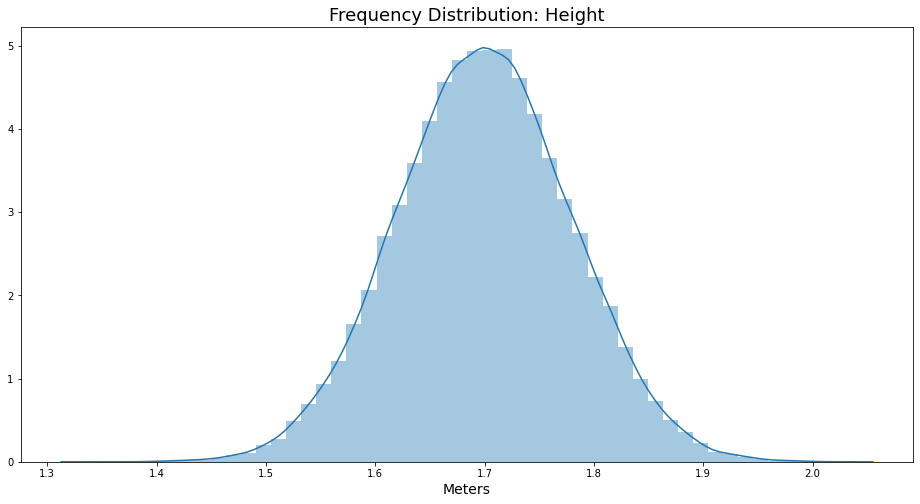

In [61]:
ax = sns.distplot(df["Height"])
ax.figure.set_size_inches(16,8)
ax.set_title('Frequency Distribution: Height', fontsize = 18)
ax.set_xlabel('Meters', fontsize=14)
ax

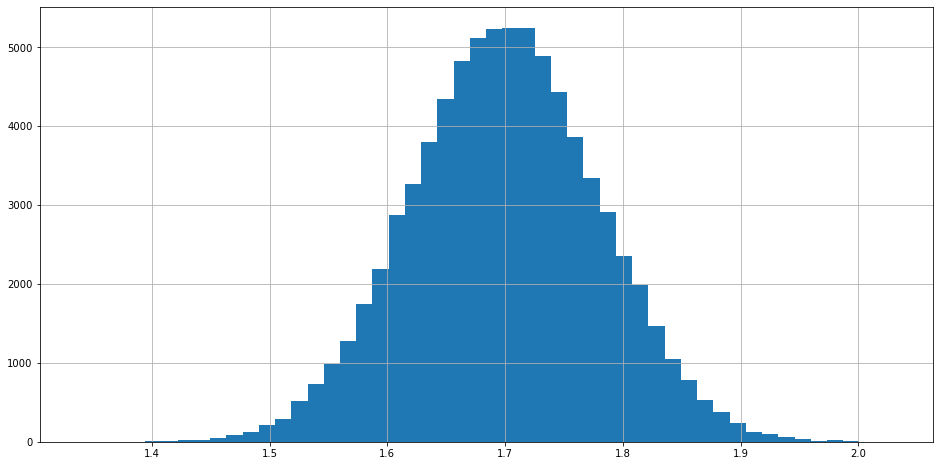

In [62]:
df['Height'].hist(bins=50, figsize=(16,8))

In [64]:
income_class_frequency_distribution_quantitative

,Frequency,%
E,49755,64.751432
D,16700,21.733472
C,7599,9.889381
B,2178,2.834461
A,608,0.791255


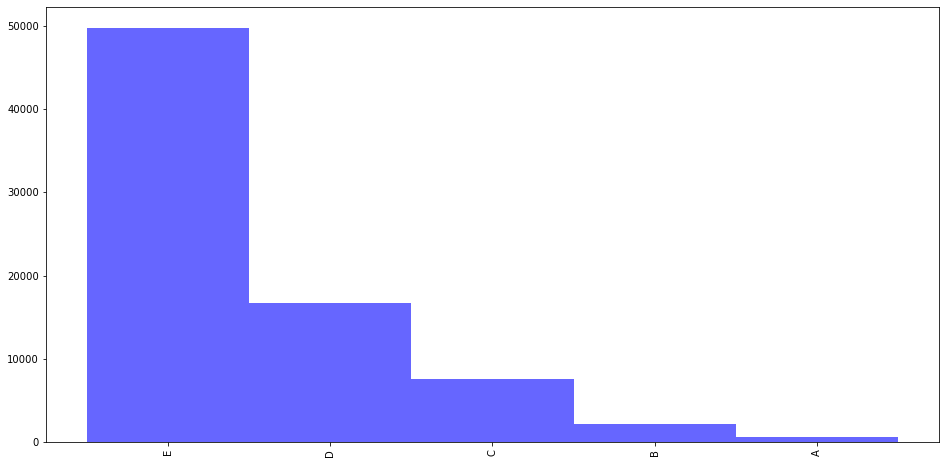

In [68]:
income_class_frequency_distribution_quantitative["Frequency"].plot.bar(width=1, color='blue', alpha=0.6, figsize=(16,8))

# 3 Measures of Central Tendency
***

## DataFrame

## <font color=green>3.1 Média aritmética</font>
***

É representada por $\mu$ quando se refere à população e por $\bar{X}$ quando se refere à amostra

# $$\mu = \frac 1n\sum_{i=1}^{n}X_i$$

onde 

$n$ = número de observações (registros)

$X_i$ = valor da i-ésima observação (registro)

## <font color=green>3.2 Mediana</font>
***

Para obtermos a mediana de uma conjunto de dados devemos proceder da seguinte maneira:
1. Ordenar o conjunto de dados;
2. Identificar o número de observações (registros) do conjunto de dados ($n$);
3. Identicar o elemento mediano:

> Quando $n$ for ímpar, a posição do elemento mediano será obtida da seguinte forma:


# $$Elemento_{Md} = \frac{n+1}2$$

> Quando $n$ for par, a posição do elemento mediano será obtida da seguinte forma:


# $$Elemento_{Md} = \frac{n}2$$

4. Obter a mediana:

> Quando $n$ for ímpar:


# $$Md = X_{Elemento_{Md}}$$

> Quando $n$ for par:


# $$Md = \frac{X_{Elemento_{Md}} + X_{Elemento_{Md}+1}}2$$
***

### Exemplo 1 - n ímpar

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img002.png' width='40%' style="float:left">

### Exemplo 2 - n par

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img003.png' width='50%' style="float:left">

### Obtendo a mediana em nosso dataset

## <font color=green>3.3 Moda</font>
***

Pode-se definir a moda como sendo o valor mais frequente de um conjunto de dados. A moda é bastante utilizada para dados qualitativos.

### Obtendo a moda em nosso dataset

## <font color=green>3.4 Relação entre média, mediana e moda</font>
***

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img004.png' width='80%'>

### Avaliando a variável RENDA

***

### Avaliando a variável ALTURA

***

### Avaliando a variável ANOS DE ESTUDO

# <font color=green>4 MEDIDAS SEPARATRIZES</font>
***

## <font color=green>4.1 Quartis, decis e percentis</font>
***

Há uma série de medidas de posição semelhantes na sua concepção à mediana, embora não sejam medidas de tendência central. Como se sabe, a mediana divide a distribuição em duas partes iguais quanto ao número de elementos de cada parte. Já os quartis permitem dividir a distribuição em quatro partes iguais quanto ao número de elementos de cada uma; os decis em dez partes e os centis em cem partes iguais.

## <font color=green>4.2 Box-plot</font>
***

O box plot dá uma idéia da posição, dispersão, assimetria, caudas e dados discrepantes (outliers). A posição central é dada pela mediana e a dispersão por $IIQ$. As posições relativas de $Q1$, $Mediana$ e $Q3$ dão uma noção da simetria da distribuição. Os comprimentos das cauda são dados pelas linhas que vão do retângulo aos valores remotos e pelos valores atípicos.

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img005.png' width='65%'>

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img006.png' width='80%'>

# <font color=green>5 MEDIDAS DE DISPERSÃO</font>
***

Embora as medidas de posição forneçam uma sumarização bastante importante dos dados, elas podem não ser suficientes para caracterizar conjuntos distintos, especialmente quando as observações de determinada distribuição apresentarem dados muito dispersos.

## <font color=green>5.1 Desvio médio absoluto</font>
***


# $$DM = \frac 1n\sum_{i=1}^{n}|X_i-\bar{X}|$$


## <font color=green>5.2 Variância</font>
***

### Variância

A variância é construída a partir das diferenças entre cada observação e a média dos dados, ou seja, o desvio em torno da média. No cálculo da variância, os desvios em torno da média são elevados ao quadrado.

### Variância populacional

# $$\sigma^2 = \frac 1n\sum_{i=1}^{n}(X_i-\mu)^2$$

### Variância amostral

# $$S^2 = \frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2$$

## <font color=green>5.3 Desvio padrão</font>
***

Uma das restrições da variância é o fato de fornecer medidas em quadrados das unidades originais - a variância de medidas de comprimento, por exemplo, é em unidades de área. Logo, o fato de as unidades serem diferentes dificulta a comparação da dispersão com as variáveis que a definem. Um modo de eliminar essa dificuldade é considerar sua raiz quadrada.

### Desvio padrão populacional

# $$\sigma = \sqrt{\frac 1n\sum_{i=1}^{n}(X_i-\mu)^2} \Longrightarrow \sigma = \sqrt{\sigma^2}$$

### Desvio padrão amostral

# $$S = \sqrt{\frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2} \Longrightarrow S = \sqrt{S^2}$$